**Q1**

In [ ]:
import pandas as pd
data={"Square Feet(X)":[1400,1600,1700,1875,1100,1550,2350,2450,1425,1700],
      "House Price(Y)":[245,312,279,308,199,219,405,324,319,255]}
df=pd.DataFrame(data,columns=["Square Feet(X)","House Price(Y)"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Square Feet(X)  10 non-null     int64
 1   House Price(Y)  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


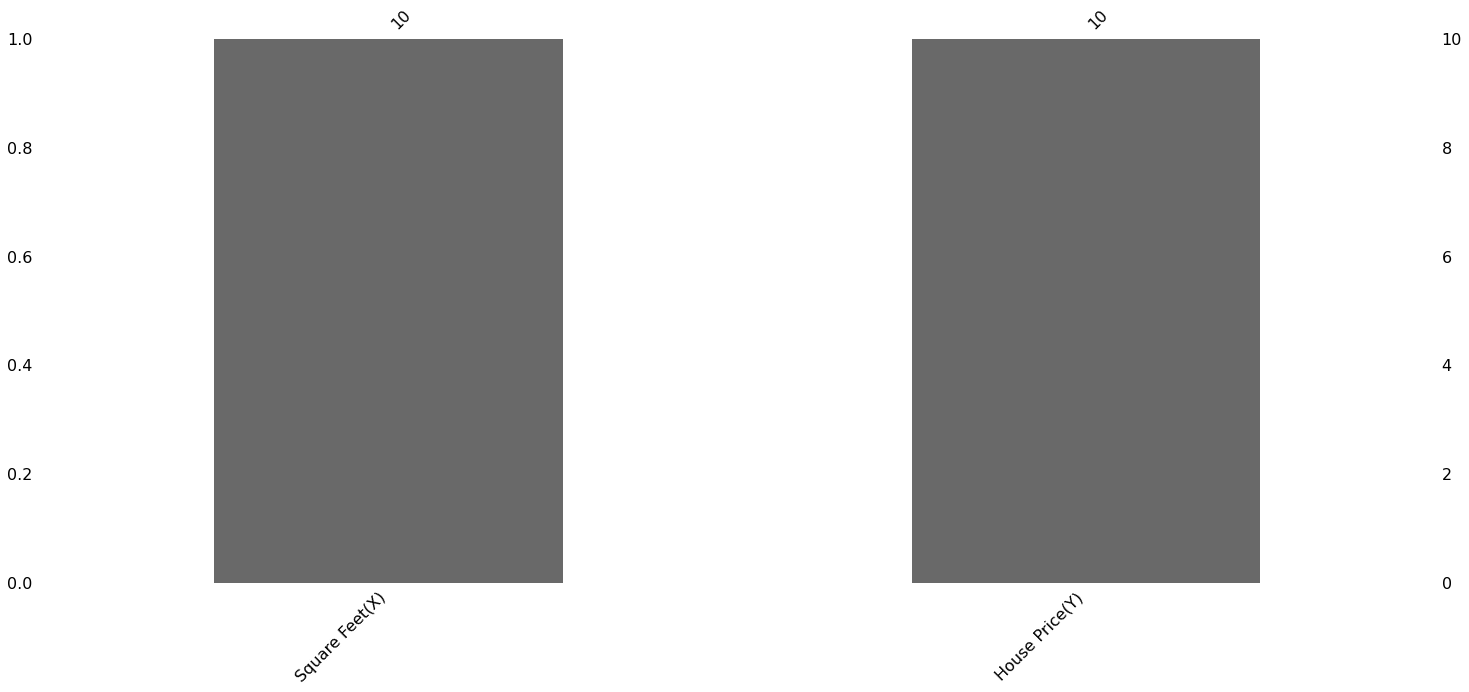

In [ ]:
#removing noise
import missingno as ms
ms.bar(df)

In [ ]:
import numpy as np
X=df.iloc[:,0:1]
Y=df.iloc[:,1]
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=10)


In [ ]:
#finding regression coefficients
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[284.68283535]
 [ 46.5754368 ]]


In [ ]:
#predicting values on test set
y_new=np.array([3000,2000,1500]).reshape(-1,1)
y_scaled=scaler.fit_transform(y_new)
y_scaled=np.insert(y_scaled,0,values=1,axis=1)
y_predict=y_scaled.dot(beta)
print(y_predict)
y_new

[[346.92188077]
 [272.23502627]
 [234.89159902]]


array([[3000],
       [2000],
       [1500]])

In [ ]:
#performance evaluation
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)
rms_error=np.sqrt(mean_square_error)
print(rms_error)
y_mean=np.mean(y_test)
total_sumofsquares=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_sumofsquares)

359.313071558704
18.95555516355836
0.7872488392086621


**Q2**

In [9]:
import pandas as pd
#data={"Year":[2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
      #"Month":[12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
      #"Interest_Rate":[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
      #"Unemployment_Rate":[5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
      #"Stock_Index_Price":[1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]}
#df=pd.DataFrame(data,columns=["Year","Month","Interest_Rate","Unemployment_Rate","Stock_Index_Price"])
df=pd.read_csv("DataEntry.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     int64  
 1   Month              24 non-null     int64  
 2   Interest_Rate      24 non-null     float64
 3   Unemployment_Rate  24 non-null     float64
 4   Stock_Index_Price  24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


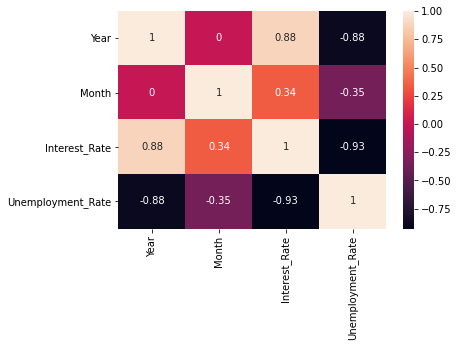

In [10]:
#removing noise
import missingno as ms
#ms.bar(df)

import seaborn as sns
sns.heatmap(df.iloc[:,0:4].corr(),annot=True)

In [11]:
import numpy as np
X=df.iloc[:,2:4]
Y=df.iloc[:,4]
X=np.array(X).reshape(24,2)
Y=np.array(Y).reshape(-1,1)
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.4,random_state=24)


In [38]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[1064.15019286]
 [ 139.68772531]
 [ -73.67549916]]


In [39]:
#predicting values on test set
y_new=np.array([1.5,5.8]).reshape(1,2)
y_scaled=scaler.fit_transform(y_new)
y_scaled=np.insert(y_scaled,0,values=1,axis=1)
y_predict=y_scaled.dot(beta)
print(y_predict)

[[1064.15019286]]


In [40]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)
rms_error=np.sqrt(mean_square_error)
print(rms_error)
y_mean=np.mean(y_test)
total_sumofsquares=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_sumofsquares)

215522.87119130738
464.24440889611947
-0.009111337374535289
